In [2]:
import numpy as np
import numpy.random as random
import pandas as pd
import scipy as sp
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3


'%.3f'

In [3]:
import sklearn

__단순회귀분석__

---

회귀 분석은 주어진 데이터에서 변수 사이에 어떠한 관계를 가정하고 이 관계를 가장 잘 표현하는 수식을 구하는 것이다.

회귀 분석은 설명변수를 활용해 목표변수를 예측하며, 지도학습(Supervised Learning)의 한 종류이며 학습할 때 데이터에 정답을 하나씩 대응시켜 관계를 계산하는 기초적인 방법이다.

회귀분석은 결괏값(목표변수)과 입력값(설명변수)의 관계에서 입력 변수가 하나인 것과 둘 이상인 것으로 나눌 수 있다. 전자를 단순회귀분석, 후자를 다중회귀분석이라고 한다.

_선형회귀분석_

선형회귀분석은 입력값과 결괏값 사이에 선형관계($y = ax + b$)를 가정한다.

선형회귀분석은 사이킷런 라이브러리의 sklearn.linear_model을 이용해 간단하게 실행할 수 있다.

linear_model을 임포트한 후 인스턴스를 생성할 수 있다



In [4]:
from sklearn import linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score

cali = fetch_california_housing()

#선형회귀 인스턴스 생성
reg = linear_model.LinearRegression()
X = pd.DataFrame(cali.target)
Y = pd.DataFrame(cali.data, columns= ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude' ])
y = np.arange(0, 8)

# 8개의 설명변수의 단순선형회귀분석 진행
for col_num in y:
    reg.fit(X, Y.iloc[:, col_num])
    print('설명변수명 : {}'.format(Y.columns[col_num]))
    print('회귀계수:', reg.coef_)
    print('절편:', reg.intercept_)
    print('결정계수 : {:.3f}'.format(reg.score(X, Y.iloc[:, col_num])))
    print('')
    

설명변수명 : MedInc
회귀계수: [1.133]
절편: 1.5273748109684981
결정계수 : 0.473

설명변수명 : HouseAge
회귀계수: [1.152]
절편: 26.256557529056042
결정계수 : 0.011

설명변수명 : AveRooms
회귀계수: [0.326]
절편: 4.755085968678553
결정계수 : 0.023

설명변수명 : AveBedrms
회귀계수: [-0.019]
절편: 1.136348304483483
결정계수 : 0.002

설명변수명 : Population
회귀계수: [-24.191]
절편: 1475.5162923505427
결정계수 : 0.001

설명변수명 : AveOccup
회귀계수: [-0.214]
절편: 3.5125940332016126
결정계수 : 0.001

설명변수명 : Latitude
회귀계수: [-0.267]
절편: 36.18383160176508
결정계수 : 0.021

설명변수명 : Longitude
회귀계수: [-0.08]
절편: -119.40461582245466
결정계수 : 0.002



In [5]:
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

다음 코드는 설명변수($X$)와 목표변수($Y$) 데이터를 대상으로 fit 함수를 사용해 예측 모델을 구축한다.

fit 함수는 최소제곱법으로 회귀계수 $a$와 절편 $b$를 계산한다. 최소제곱법은 실제 목표변수 데이터 값과 예측한 목표변수 데이터 값의 차이를 제곱하고 모두 더한 값이 최소가 될 때의 계수와 절편을 구한다.

최소제곱법(least square method)은 산포도를 비교적 잘 설명할 수 있는 직선식의 추정에 그 목적이 있다.

직선의 식은 기울기와 $y$절편만 있으면 결정된다. $y$절편을 $\beta_0$, 기울기를 $\beta_1$이라 하고 최종 결정될 최소자승법에 의한 직선식은 다음과 같다.

$$
Y = \beta_0 + \beta_1 \cdot X
$$

여기서 $\beta_1$(기울기)은 $x$와 $y$의 표봉공분산을 $x$의 표본공분산의 제곱으로 나누어 계산한다.

$$
\beta_1 = \frac{s_{xy}}{s^2_r}
$$

$y$절편은 표본 $y$의 평균값에 표본 $x$의 평균값과 위에서 계산한 $\beta_1$을 곱한 값을 차감하여 구한다.

$$
\beta_0 = \bar{y} - \beta_1 \cdot \bar{x}
$$

최소제곱법을 통하여 추정한 회귀식이 다음과 같다고 할 때,

$$
\hat{y} = \hat{\beta_0} + \hat{\beta_1} \cdot x
$$

$\hat{y}$은 종속변수의 추정치에 해당한다. $\hat{\beta_0}$은 추정 회귀식의 $y$절편이고 $\hat{\beta_1}$은 기울기이다.

종속변수 $y$와 독립변수 $x$의 표본 순서쌍이 $n$개라 할 때 각 순서쌍을 다음과 같이 정의한다.

$$
(x_1, y_1), (x_2, y_2), \cdots, (x_i, y_i), \cdots, (x_n, y_n)
$$

추정된 식에 의하여 $x$와 $\hat{y}$의 순서쌍은 다음과 같다

$$
(x_1, \hat{y_1} = \hat{\beta_0} + \hat{\beta_1} \cdot x_1), (x_2, \hat{y_2} = \hat{\beta_0} + \hat{\beta_1} \cdot x_2), \cdots, (x_n, \hat{y_n} = \hat{\beta_0} + \hat{\beta_1} \cdot x_n)
$$

여기서 실체 관측된 $y_i$와 추정된 $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} \cdot x_i$의 차이를 잔차(residual), 즉 $e_i$라 한다. 즉, 각 관찰값에 대한 잔차는 $e_i = y_i - \hat{y_i}$이다. 위의 $n$개의 변수 쌍에서 해당 잔차의 합은 언제나 0이다. 이는 $y_i$의 평균과 $\hat{y_i}$이 같기 때문에 $e_i$의 평균은 0인 것이다. 직관적으로 양의 잔차가 음의 잔차에 의해서 상쇄된다고 보아도 무방하다.

$$
\sum_{i=1}^{n}e_i = \sum_{i=1}^{n}(y_i - \hat{y_i}) = 0
$$

최소제곱법은 잔차(residual) 제곱의 합이 최소가 되도록 하는 추세선을 계산하는 것이다. 잔차 제곱의 합을 $SSE$(Sum of Squared Error)라 한다.

$$
SSE = \sum_{i=1}^{n}e^2_i = \sum_{i=1}^{n}(y_i - \hat{y_i})^2 = \sum_{i=1}^{n}(y_i - \hat{\beta_0} - \hat{\beta_1} \cdot x_i)^2
$$

최소제곱법에 의하여 $SSE$가 최소가 되는 회귀식 $\hat{y} = \hat{\beta_0} + \hat{\beta_1} \cdot x$를 추정한다. 추정 모수는 $\hat{\beta_0}, \hat{\beta_1}$이다.

$\hat{\beta_1}$은 $x$와 $y$의 표본공분산을 $x$의 표본공분산의 제곱으로 나누어 계산한다.

$$
\hat{b_1} = \frac{s_{xy}}{s^2_x}
$$

$\hat{\beta_0}$은 위에서 계사한 $\hat{\beta_1}$ 값과 종속변수 $y$의 표본평균과 독립변수 $x$의 표본평균을 이용하여 다음과 같이 산출한다.

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \cdot \bar{x}
$$

이렇게 계산된 $\hat{\beta_0}, \hat{\beta_1}$ 이 $SSE$를 최소가 되도록 하는 추정인 것이다.


추가로 해당 추세선이 실제 산포도를 얼마나 정확히 추정하고 있는지 또한 계산할 수 있다.

$\bar{y}$를 $y_1$부터 $y_n$까지 값의 평균이라 정의하자.

$$
\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

$y$변수가 평균 대비 얼마나 변동이 있는지를 나타내는 총변동은 $SST$(Sum off Squared Total)는 다음과 같이 계산한다.

$$
SST = \sum_{i_1}^{n}(y_i - \bar{y})^2
$$

회귀식에 의하여 추정된 종속변수 데이터 $\hat{y_i}$과 표본평균 $\bar{y}$의 차이에 대한 제곱합을 $SSR$(Sum of Squared Regression)이라 정의하고 해당 수식은 다음과 같이 나타낸다.

$$
SSR = \sum_{i=i}^{n}(\hat{y_i} - \bar{y})^2
$$

총변동 $SST$는 $SSR$과 $SSE$의 합과 같다.

$$
SST = SSR + SSE
\\
\sum_{i=1}^{n}(y_i - \bar{y})^2 = \sum_{i=1}^{n}(\hat{y_i} - \bar{y})^2 + \sum_{i=1}^{n}(y_i - \hat{y_i})^2
$$

회귀식의 정확성은 결정계수의 크기로 판단할 수 있다.

$SSR$은 회귀식으로 설명되는 편차제곱합이고, $SSE$는 회귀식으로 설명되지 않는 편차제곱합이다. 전체 편차제곱합인 $SST$가 있는데, 이 중 회귀식으로 설명되는 편차제곱합 $SSR$이 높으면 높을수록 더 정확한 회귀식이다.

$$
R^2 = \frac{SSR}{SST}
$$

<p>&nbsp;</p>

$$
SST = SSR + SSE
\\
\Longleftrightarrow 1 = \frac{SSR}{SST} + \frac{SSE}{SST}
\\
\Longleftrightarrow \frac{SSR}{SST} = 1 - \frac{SSE}{SST}
$$

이므로, 다음과 같이 결정계수를 표현할 수 있다.

$$
R^2 = 1 - \frac{SSE}{SST} = \frac{SSR}{SST}
$$

$SSR$은 $SST$보다 언제나 작거나 같으므로 결정계수 $R^2$은 0과 1 사이의 값을 갖는다.

$$
0 \leq R^2 \leq 1
$$

만약 $R^2$이 65%라면 추정 회귀식의 설명력이 65%라는 의미이다.


---

<p>&nbsp;</p>

__다중회귀분석__

---

설명변수가 하나인 단순회귀의 원리를 확장해 설명변수가 여러 개일 때, 다중회귀이다. 회귀계수는 회귀모형이 예측한 값과 데이터의 실젯값(목표변수)과의 차이를 제곱하고 모두 더한 값이 최소가 되도록 만드는 값으로 추정한다.

목표변수가 $y$, 설명변수가 $x_1, x_2$인 다중회귀분석은 선형관계를 가정할 때 다음과 같은 모형을 이룬다.

$$
y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \varepsilon
$$

위의 식이 모집단의 다중회귀분석을 위한 모형이다. 위 식에서는 $y$는 종속변수, $x_1, x_2$는 설명변수, $\beta_0$는 $y$절편, $\beta_1$과 $\beta_2$는 각각 $x_1, x_2$에 대한 회귀계수, $\varepsilon$은 오차항을 의미한다. 여기서 오차항 $\varepsilon$은 관찰할 수 없는 요소이고, $\beta_0, \beta_1, \beta_2$가 추정하고자 하는 모수이다.


---

<p>&nbsp;</p>

__Statsmodels를 활용한 회귀분석__

---

statsmodels 패키지에서는 OLS 클래스를 사용하여 선형회귀분석을 실시한다.

선형회귀분석을 하려면 다음의 가정을 따라야한다.

> **1.** 독립변수 X는 독립이어야 한다.

변수들끼리 상관관계가 있다면 결과는 왜곡된다. 특정 변수와 다른 변수가 선형 관계라면, 비슷한 변수가 두번 학습되게 되므로 정확한 결과를 기대하기 힘들다. 따라서, 상관관계가 있는 변수는 제거해줘야 한다.

> **2.** 변수들은 정규분포를 가진다는 가정이 전제되어야 한다.

정규분포를 가지지 않고 한쪽으로 치우친다면 정확한 결과를 기대하기 힘들다. 따라서, 정규성을 가지지 않는 변수는 정규성을 가질 수 있도록 로그나 지수의 방법으로 치환하여 범위를 늘리거나 줄이는 방식으로 정규분포를 만드는 것도 한가지 방법이라고 할 수 있다.

> **3.** 종속변수 y와 독립변수 X는 선형 상관관계를 가지는 것을 가정한다.

선형이 아니라면 다른 회귀분석 방법을 사용하거나 기존의 변수를 변경시켜야 한다.



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.DataFrame(cali.target, columns=["MedHV"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state=0)

full_model = sm.OLS(y_train, X_train)
fitted_full_model = full_model.fit()
fitted_full_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  MedHV   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          1.102e+04
Date:                Fri, 23 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:14:36   Log-Likelihood:                         -11903.
No. Observations:               10320   AIC:                                  2.382e+04
Df Residuals:                   10312   BIC:                                  2.388e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5282      0.006     87.371      0.000       0.516       0.540
HouseAge       0.0153      0.001     23.780      0.000       0.014       0.017
AveRooms      -0.2042      0.009    -23.175      0.000      -0.221      -0.187
AveBedrms      0.9064      0.041     22.052      0.000       0.826       0.987
Population  6.818e-06   6.95e-06      0.981      0.326    -6.8e-06    2.04e-05
AveOccup      -0.0089      0.001     -7.556      0.000      -0.011      -0.007
Latitude      -0.0612      0.005    -12.217      0.000      -0.071      -0.051
Longitude     -0.0159      0.002    -10.027      0.000      -0.019      -0.013
==============================================================================
Omnibus:                     2113.064   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5649.893
Skew:                           1.101   Prob(JB):                         0.00
Kurtosis:                       5.879   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>OLS 회귀분석 결과 해석

https://ysyblog.tistory.com/119

[3] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

OLS의 결과를 보면 다중공선성의 문제(과최적화, overfitting)가 있음을 알 수 있다.

다중공선성이란 독립변수의 일부가 다른 독립변수의 조합으로 표현될 수 있는 경우이다. 독립변수들이 서로 독립이 아니라 상호상관관계가 강한 경우에 발생한다. 이는 독립변수의 공분산 행렬이 full rank 이어야 한다는 조건을 침해한다.

다중공선성이 있으면 독립변수의 공분산 행렬의 조건수(conditional number)가 증가한다.

독립변수가 서로 의존하게 되면 회귀 결과의 안정성을 해칠 가능성이 높아지며, 이를 방지하는 방법은 다음과 같다

> **1.** 변수선택법으로 의존적인 변수 삭제

> **2.** PCA(principal component analysis) 방법으로 의존적인 성분 삭제

> **3.** 정규화(regularized) 방법 사용



---

<p>&nbsp;</p>

VIF

---

다중공선성을 없애는 가장 기본적인 방법은 다른 독립변수에 의존하는 변수를 없애는 것이다. 가장 의존적인 독립변수를 선택하는 방법으로는 VIF(Variance Inflation Factor)를 사용할 수 있다. VIF는 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸 것이다. i번째 변수의 VIF는 다음과 같이 계산한다.

$$

VIF_i = \frac{\sigma^2}{(n-1)Var[X_i]} \cdot \frac{1}{1-R^2_i}

$$

여기에서 R^2_i는 다른 변수로 i번째 변수를 선형회귀한 성능(결정계수)이다. 다른 변수에 의존적일수록 VIF가 커진다.




In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

cali_data_frame = pd.DataFrame(cali.data, columns= ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude' ])
col_list = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude' ]

scaler = StandardScaler()
scaled_cali = cali_data_frame.copy()
scaled_cali[col_list] = scaler.fit_transform(cali_data_frame[col_list])


vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(scaled_cali.values, i) for i in range(scaled_cali.shape[1])]
vif['features'] = scaled_cali.columns
vif

,VIF Factor,features
0,2.501295,MedInc
1,1.241254,HouseAge
2,8.342786,AveRooms
3,6.994995,AveBedrms
4,1.138125,Population
5,1.008324,AveOccup
6,9.297624,Latitude
7,8.962263,Longitude


In [8]:
X2 = pd.DataFrame(scaled_cali, columns = col_list)

X2.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


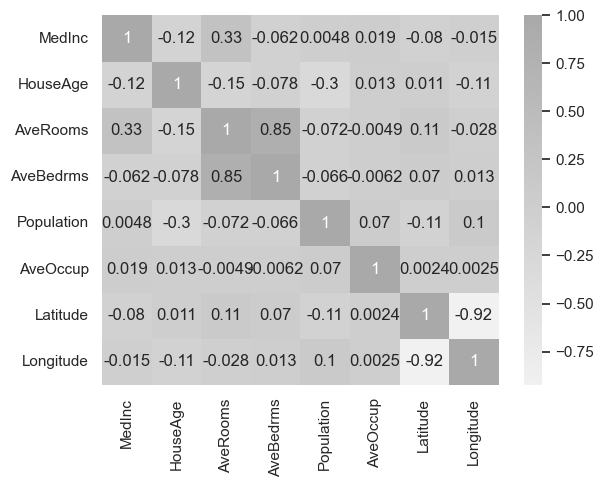

In [9]:
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X2.corr(), annot=True, cmap=cmap)
plt.show()

In [14]:
scaled_cali2 = scaled_cali.drop(['Population'], axis=1)
X2 = sm.add_constant(scaled_cali2)
y = cali.target.reshape(len(cali.target),1)
scaled_y = scaler.fit_transform(y)
y2 = pd.DataFrame(scaled_y)

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5, random_state=0)

scaled_model = sm.OLS(y_train, X_train)
fitted_full_model2 = scaled_model.fit()
fitted_full_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2300.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:33:31   Log-Likelihood:                -9760.5
No. Observations:               10320   AIC:                         1.954e+04
Df Residuals:                   10312   BIC:                         1.959e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.006      0.030      0.976      -0.012       0.012
MedInc         0.7358      0.010     73.692      0.000       0.716       0.755
HouseAge       0.1069      0.006     16.621      0.000       0.094       0.119
AveRooms      -0.2532      0.018    -13.797      0.000      -0.289      -0.217
AveBedrms      0.2670      0.016     16.616      0.000       0.235       0.298
AveOccup      -0.0550      0.010     -5.526      0.000      -0.074      -0.035
Latitude      -0.7510      0.019    -39.605      0.000      -0.788      -0.714
Longitude     -0.7235      0.019    -38.843      0.000      -0.760      -0.687
==============================================================================
Omnibus:                     2192.961   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6420.793
Skew:                           1.108   Prob(JB):                         0.00
Kurtosis:                       6.165   Cond. No.                         6.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
y = pd.DataFrame(cali.target, columns=['MedHV'])
x = pd.DataFrame(cali.data, columns=cali.feature_names)
df = pd.concat([y, X],axis=1)


def get_model(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula('MedHV ~ scale(MedInc) + scale(HouseAge) + scale(AveRooms) + scale(AveOccup) + scale(Latitude)', data=df_train)
    return df_train, df_test, model.fit()

df_train, df_test, result2 = get_model(3)
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  MedHV   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     2290.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:16:24   Log-Likelihood:                -12313.
No. Observations:               10320   AIC:                         2.464e+04
Df Residuals:                   10314   BIC:                         2.468e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.0777      0.008    2


_모델 구축 및 모델 평가 과정_

> **1.** 모델 구축을 위한 클래스의 인스턴스 생성

model = LinearRegression()

> **2.** 데이터를 설명변수와 목표변수로 나눔

$X$와 $y$

> **3.** 훈련 데이터와 테스트 데이터로 분할

train_test_spilit(X, y, test_size = 0.5, random_state = 0)

> **4.** 훈련 데이터를 이용하여 학습

model.fit(X_train, y_train)

> **5.** 모델 성능을 테스트 데이터로 평가

model.score(X_test, y_test)

In [ ]:
import requests, zipfile
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

auto.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
                'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height',
                'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
                'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [ ]:
print('자동차 데이터 형태:{}'.format(auto.shape))

자동차 데이터 형태:(205, 26)


In [ ]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
#물음표 개수 확인

auto = auto[['price', 'horsepower','width','height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [ ]:
#NaN으로 변환 후 제거

auto = auto.replace('?', np.nan).dropna()
print('자동차 데이터 형태:{}'.format(auto.shape))

자동차 데이터 형태:(199, 4)


In [ ]:
print('데이터 형 확인(형 변환 전)\n{}\n'.format(auto.dtypes))

데이터 형 확인(형 변환 전)
price          object
horsepower     object
width         float64
height        float64
dtype: object



In [ ]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))
print('데이터 형 확인(형 변환 후)\n{}'.format(auto.dtypes))

데이터 형 확인(형 변환 후)
price           int64
horsepower      int64
width         float64
height        float64
dtype: object


In [ ]:
auto.corr()

#상관관계가 높은 변수들을 다중회귀의 모델에 함께 설명변수로 투입하면 다중공선성(multicollinearity)이 발생할 가능성이 있음
#변수 간의 상관관계가 높아 회귀계수의 분산이 커지고, 결과적으로 회귀계수의 통계적 유의성이 없어짐
#이러한 이유로 상관관계가 높은 변수 그룹을 대표하는 변수만을 다중회귀모델에 투입함

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


In [ ]:
#데이터 분할(훈련 데이터와 테스트 데이터)을 위한 임포트
from sklearn.model_selection import train_test_split

#다중회귀 모델 구축을 위한 임포트
from sklearn.linear_model import LinearRegression

#목표변수로 price를 지정, 설명변수로는 price 외의 다른 변수를 지정
X = auto.drop('price', axis=1)
y = auto['price']

#훈련 데이터와 테스트 테이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#다중회귀 클래스 초기화와 학습
model = LinearRegression()
model.fit(X_train, y_train)

#결정계수 출력
print('결정계수(train):{:.3f}'.format(model.score(X_train, y_train)))
print('결정계수(test):{:.3f}'.format(model.score(X_test, y_test)))

print('\n회귀계수\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('절편: {:.3f}'.format(model.intercept_))

결정계수(train):0.733
결정계수(test):0.737

회귀계수
horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
절편: -128409.046
